<a href="https://colab.research.google.com/github/upendarthota/ML-Projects/blob/main/Wind_Power_Generation_Forecasting_AICTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wind Power Generation Forecasting

```
# This is formatted as code
```



In [56]:
# import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #scaling
import warnings
warnings.filterwarnings('ignore')

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
location1=pd.read_csv('/content/drive/MyDrive/ML /Weather/Location1.csv')
location2=pd.read_csv('/content/drive/MyDrive/ML /Weather/Location2.csv')
location3=pd.read_csv('/content/drive/MyDrive/ML /Weather/Location3.csv')
location4=pd.read_csv('/content/drive/MyDrive/ML /Weather/Location4.csv')

In [59]:
# see the location 1
location1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [60]:
# Add a new column to identify the location
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'


# Concatenate to a dataframe
merged_data = pd.concat([location1, location2, location3, location4], ignore_index=True)

merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


In [61]:
# save the merged dataset to a new CSV file

merged_data.to_csv('/content/drive/MyDrive/ML /Weather/merged_locations.csv', index=False)

In [62]:
# To see the basic information about the dataset

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [63]:
# To check the statistics of dataset
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [64]:
# check the missing values
#merged_data.isnull()
merged_data.isnull().sum()

,0
Time,0
temperature_2m,0
relativehumidity_2m,0
dewpoint_2m,0
windspeed_10m,0
windspeed_100m,0
winddirection_10m,0
winddirection_100m,0
windgusts_10m,0
Power,0


In [65]:
# To check the duplicated rows

merged_data.duplicated().sum()

np.int64(0)

In [66]:
# Encode the categorical variables
merged_data = pd.get_dummies(merged_data, columns=['Location'], drop_first=True)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


In [67]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [68]:
# Let's remove time col
merged_data.drop('Time', axis=1, inplace=True)

In [69]:
merged_data.head()


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


EDA


In [70]:
# Let's extract the numerical columns
numerical_columns = merged_data.select_dtypes(include=['number']).columns
numerical_columns


Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')

In [71]:
merged_data.shape


(175200, 12)

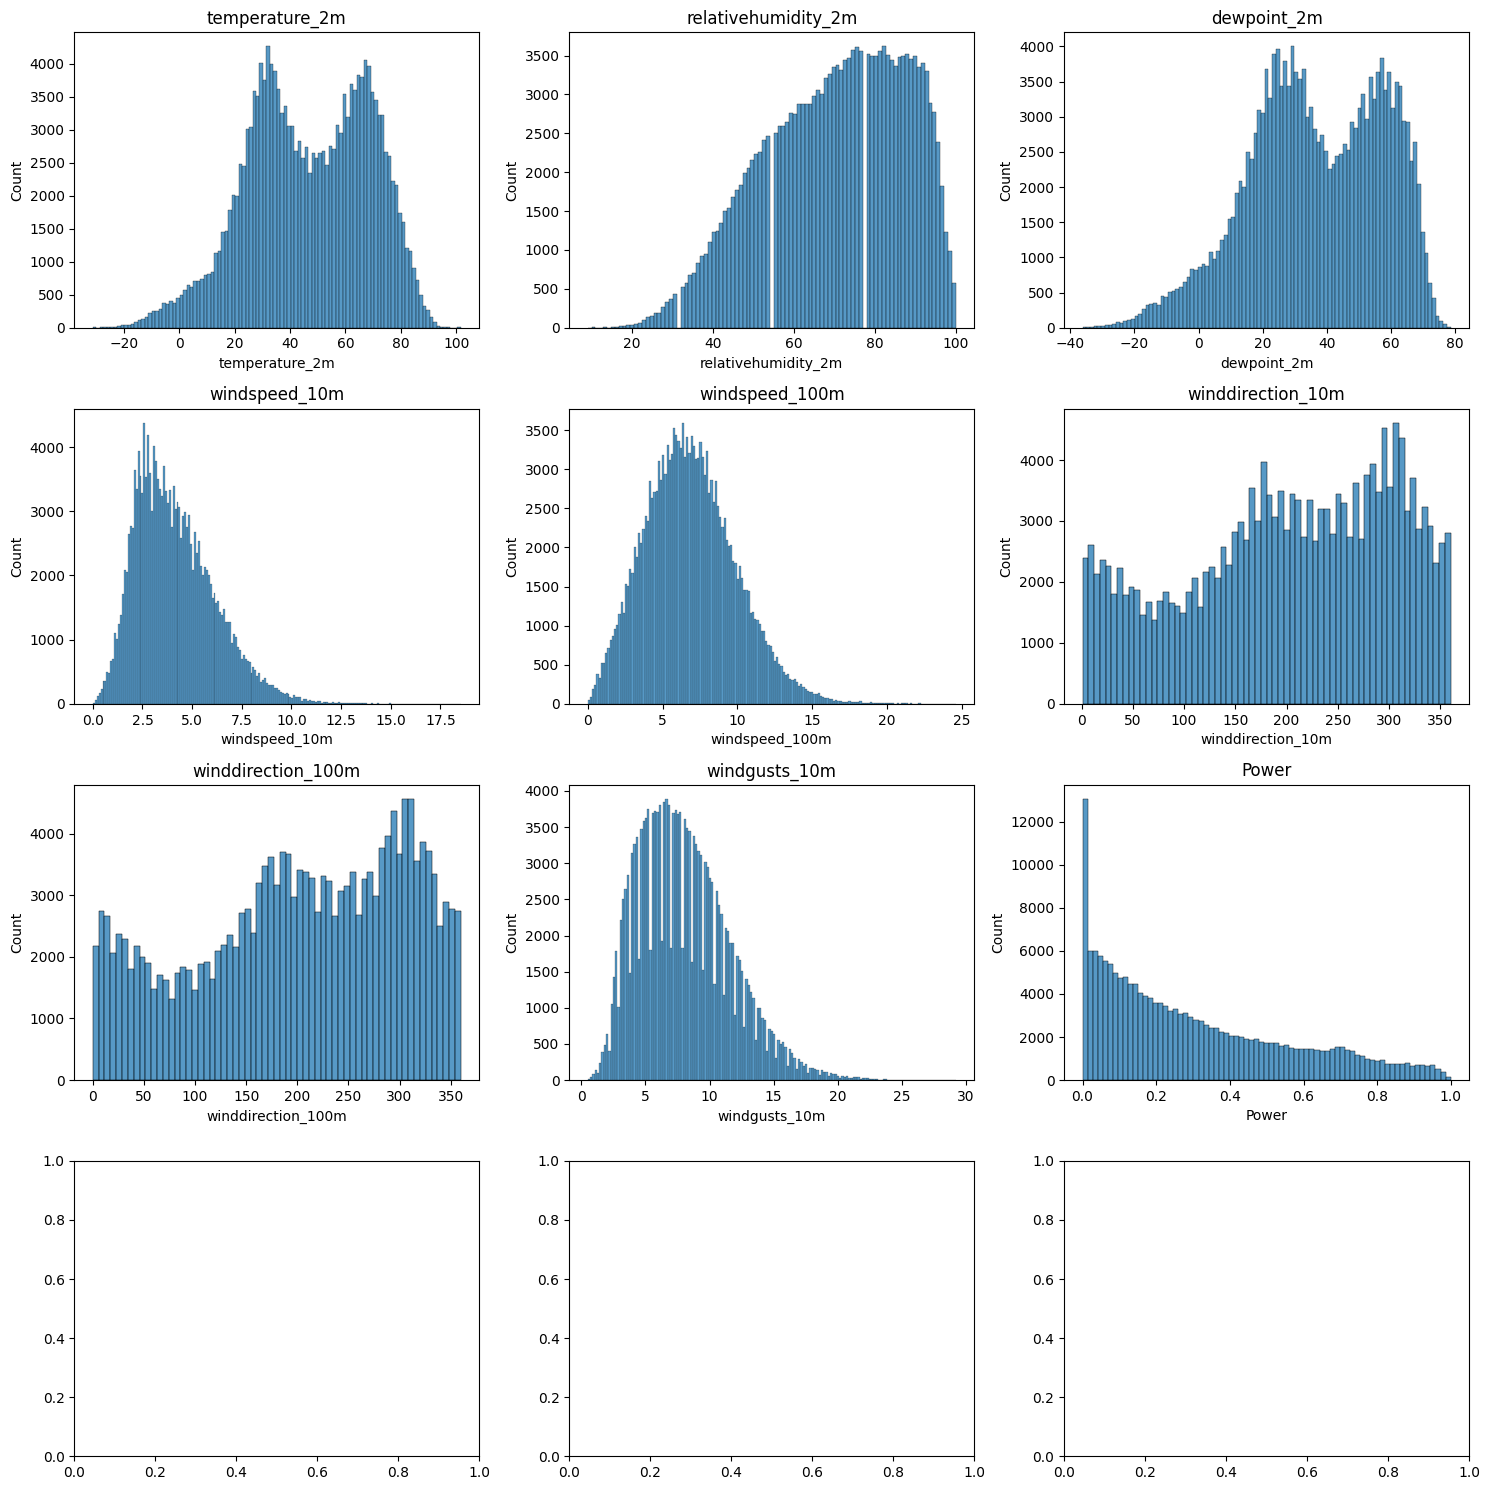

In [72]:
# let's plot using subplots for the data distribution of each numerical cols
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten() # we have 2d array and for that we need indices, rows/cols, so converting into 1d array
for i, col in enumerate(numerical_columns):
    sns.histplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

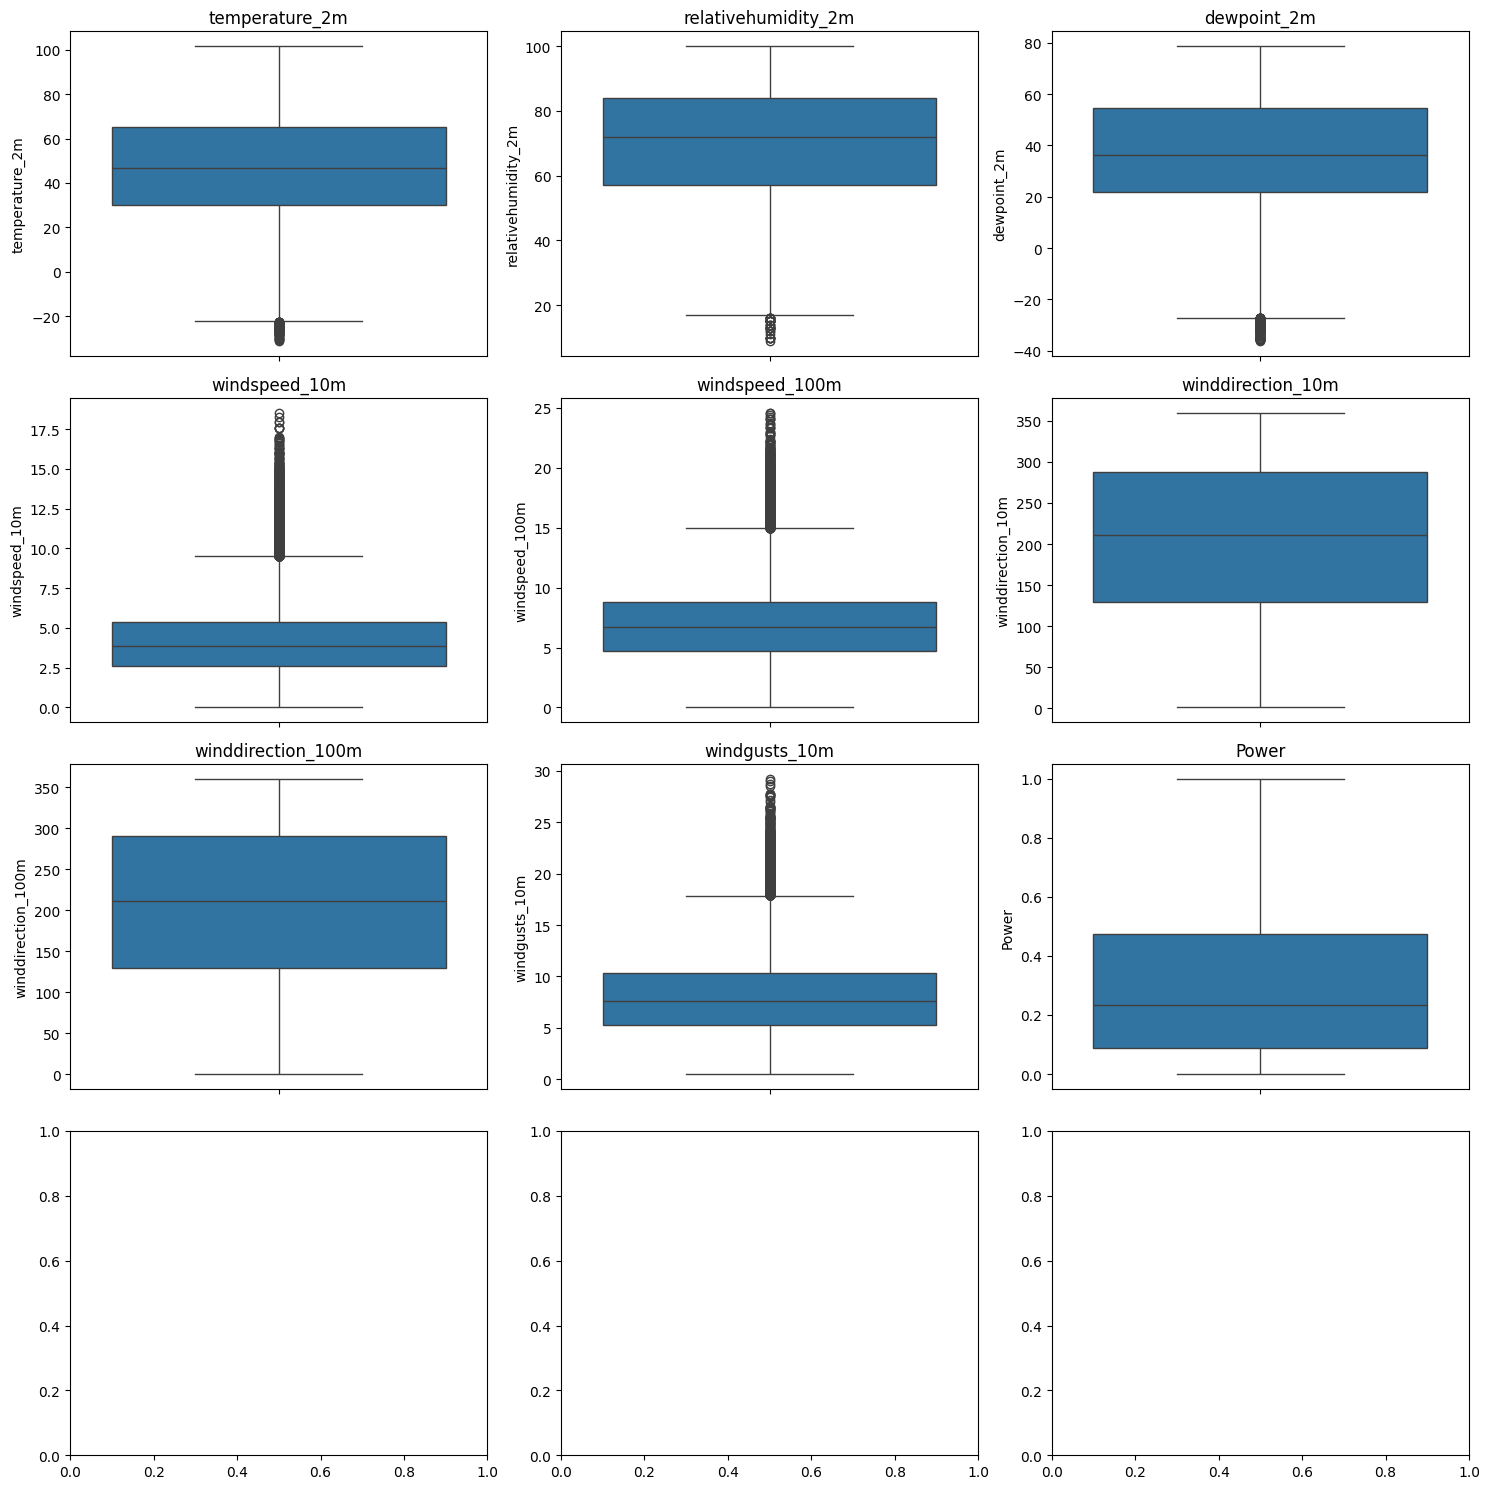

In [73]:
# Let's create box plot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

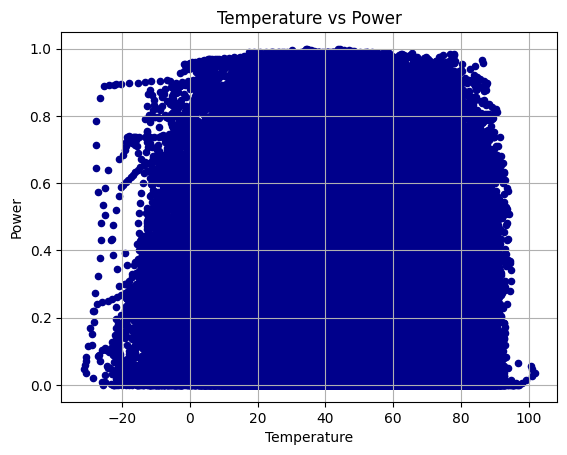

In [74]:
# let's use scatter plot to see the relationship between power & temp
merged_data.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

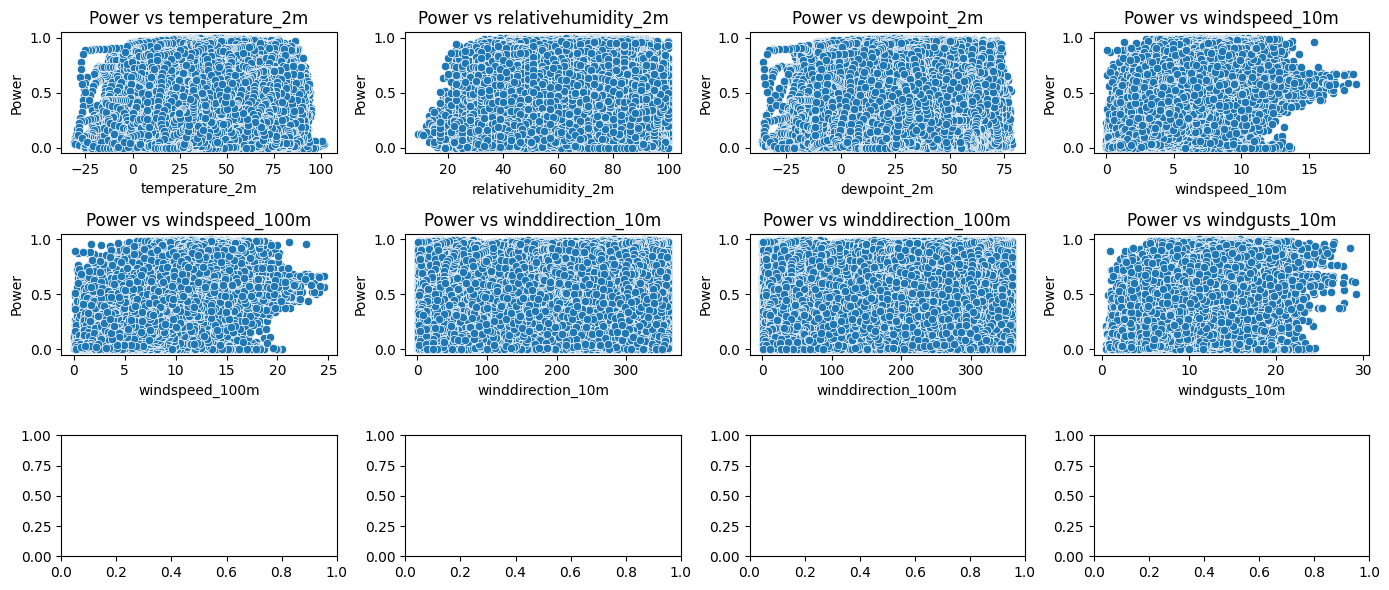

In [75]:
# Creating multiple plots to see the relation btw different cols and power
fig, axes = plt.subplots(3, 4, figsize=(14, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=merged_data, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()

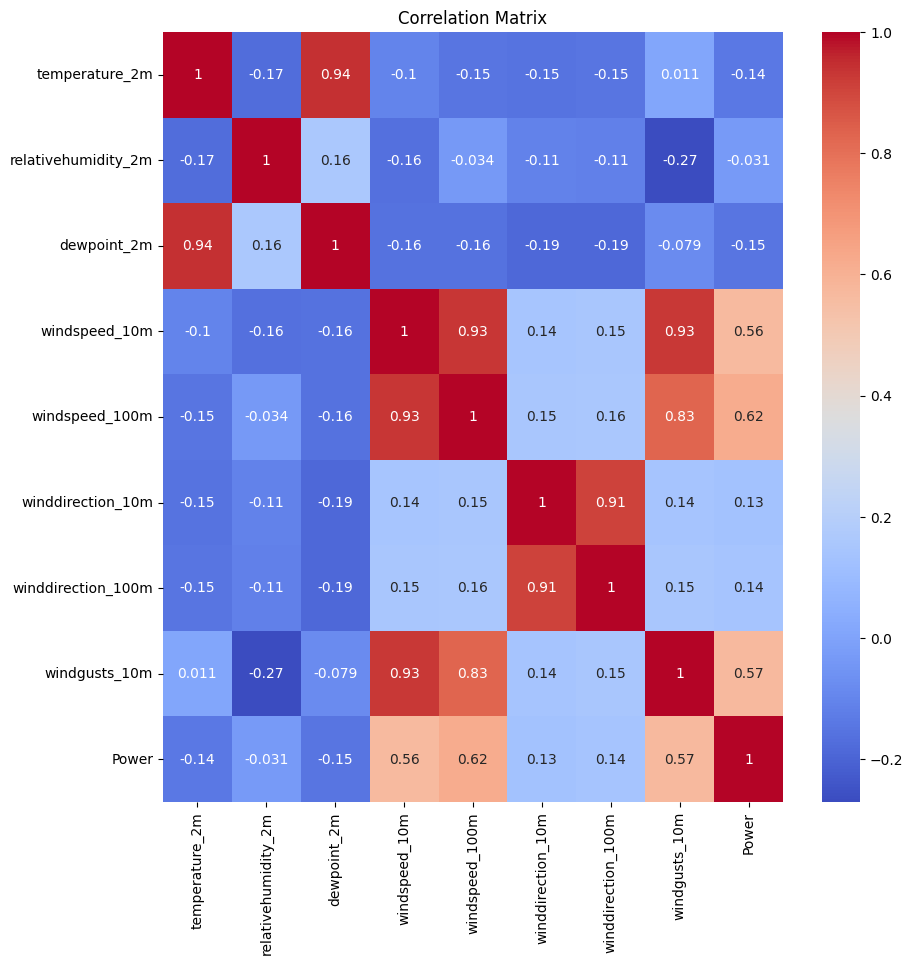

In [76]:
# Check the correlation between the cols and power
correlation = merged_data[numerical_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Week 3: Data modeling and evaluate



In [77]:
# Feature and target selection
X = merged_data.drop('Power', axis=1) # features
y = merged_data['Power'] # target

In [78]:
# Split the data into training and test sets - 80% & 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
# Train with Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [81]:
# Make the predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R Squared Score: {r2}')

Mean Absolute Error: 0.13765858053375127
Mean Squared Error: 0.03254230698731513
R Squared Score: 0.5127994646410983


In [82]:
# Train using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RF Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [83]:
# Let's predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.10662940119863015
RF MSE: 0.02155910436314834
RF R2 Score: 0.6772322505691262


In [84]:
# Train using XGBoost Regressor Model
from xgboost import XGBRegressor
# Initialize the model
xgb_model = XGBRegressor()
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
# Prediction
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGB MAE: {mae_xgb}')
print(f'XGB MSE: {mse_xgb}')
print(f'XGB R2: {r2_xgb}')

XGB MAE: 0.11572619130940615
XGB MSE: 0.024946639423317377
XGB R2: 0.6265164578779464


In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE for evaluation
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best MAE: {-grid_search.best_score_}')

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Mean Absolute Error (MAE): {mae_tuned}')
print(f'Tuned Model Mean Squared Error (MSE): {mse_tuned}')
print(f'Tuned Model R^2 Score: {r2_tuned}')